# student id = 20152424
# name = Rocky Kim
# github link = https://github.com/Epicevent/assignment03

 # import pakage 

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plot

# define number for XCOORD,YCOORD , LABEL

In [2]:
# for numpy array slice 
def XCOORD():
    return 0

def YCOORD():
    return 1

def LABEL():
    return 2

# functions for Initialize points with label 

In [3]:
'''
 just use generate_point_cluster
 sample code:
 print (genrate_point_cluster(3,5))
>>
 [
    [0.6747255  0.95402676 0.80973627 0.18467449 0.00710458] // it means Xcoord
    [0.94197336 0.74692281 0.72605815 0.34252517 0.79751694] // it means Ycoord
    [0.         2.         0.         0.         2.        ] // it means index of label (think of int)
    ]

'''


def generate_point_cluster(number_of_clusters, number_of_points):
    init_points = np.random.rand(2, number_of_points)
    return initialise_label(number_of_clusters, init_points, number_of_points)


def initialise_label(number_of_clusters, init_points, number_of_points):
    init_labels = np.random.randint(number_of_clusters, size=(1, number_of_points))
    return np.concatenate((init_points, init_labels), axis=0)

# function for Compute distance

In [4]:
def compute_distance(pair_of_points):
    # this code use Euclidean Squared Distance Metric
    # The Euclidean Squared distance metric uses the same equation as the Euclidean distance metric, but does not take
    # the square root.
    # As a result, clustering with the Euclidean Squared distance metric is faster
    # than clustering with the regular Euclidean distance.
    # The output of Jarvis-Patrick and K-Means clustering is not affected
    # if Euclidean distance is replaced with Euclidean squared.However,
    # the output of hierarchical clustering is likely to change.
    return ((pair_of_points[0][XCOORD()] - pair_of_points[1][XCOORD()]) ** 2
            + (pair_of_points[0][YCOORD()] - pair_of_points[1][YCOORD()]) ** 2)

# function for Compute Centroid 

In [5]:
def compute_centroid(points_with_previous_label, number_of_cluster):
    centroid = np.zeros((2, number_of_cluster), dtype=float) # to use for loop [i,j]
    for label in range(number_of_cluster):
        condition = points_with_previous_label[LABEL():] == label
        xcenterofthecentroid = np.average(points_with_previous_label[XCOORD(), condition[0]])
        ycenterofthecentroid = np.average(points_with_previous_label[YCOORD(), condition[0]])
        # the centroid is avaraged point ( called gravity center in physics)
        centroid[XCOORD(), label] = xcenterofthecentroid
        centroid[YCOORD(), label] = ycenterofthecentroid
    return centroid

# base functions for assign new Label and caculate Energy

In [6]:
def distance_of_everypoints_from_each_centroid(points_with_label, centroid, number_of_points, number_of_cluster):
    # it returns all distance value for each centroid
    # row means : respect with one centroid distance from each point
    # colum means : respect with one point distance from each centroid
    # we will use this fucntion to get minimum distance comparing another centroid
    # and we will use this fucntion to get summation of distances from assigned label centroid
    # to get energy
    points = points_with_label[[XCOORD(), YCOORD()], :]
    distance_array = np.zeros((number_of_cluster, number_of_points))
    for i in range(number_of_points):
        for j in range(number_of_cluster):
            distance_array[j, i] = compute_distance((points[:, i], centroid[:, j]))
    return distance_array

# assign label function

In [7]:
'''
    'distancearray' is return value for distance_of_everypoints_ ... ()
    sample code :
    
    place_to_assign_label = label_of_point(distancearray)
    points_with_label = assign_label(points_with_label, place_to_assign_label, number_of_points)
    
    note: you must use both of functions 
    why : becase of debugging ,I seperate them. :>

'''


def label_of_point(distance_array):
    return np.argmin(distancearray, axis=0)


def assign_label(points_with_previous_label, place_to_assign_label, number_of_points):
    for i in range(number_of_points):
        points_with_previous_label[LABEL(), i] = place_to_assign_label[i]
    return points_with_previous_label

# ENERGY

In [8]:
def caculate_energy(distance_array, label, number_of_points):
    energy = 0
    for i in range(number_of_points):
        label_of_point = int(label[0,i])
        energy += distance_array[label_of_point,i] # since My distance is squared , it Works well !
    return energy

# I will choose 100 points and 3 cluster
# I will plot the points in RGB ,because number of cluster is three!

In [9]:
def show_points_with_3label(points_with_label,centroid):
    # show the points with 3 label
    points_x =points_with_label[XCOORD(),:]
    points_y = points_with_label[YCOORD(),:]
    pos_label_0 = (points_with_label==0)[LABEL(),:]
    plt.plot(points_x[pos_label_0],points_y[pos_label_0],'ro') # red 
    pos_label_1 = (points_with_label==1)[LABEL(),:]
    plt.plot(points_x[pos_label_1],points_y[pos_label_1],'go')  # green
    pos_label_2 = (points_with_label==2)[LABEL(),:]
    plt.plot(points_x[pos_label_2],points_y[pos_label_2],'bo')  # blue
    if len(centroid) == 0:
        plt.show()
        return
    plt.plot(centroid[XCOORD(),:],centroid[YCOORD(),:],'yx')   # xshape point (Yellow)
    plt.show()
    return

In [10]:
    number_of_points = 100
    number_of_cluster = 3
    np.set_printoptions(suppress=True)
    points_with_label = generate_point_cluster(number_of_cluster, number_of_points)
    previous_energy = float("inf") # we will use this variable for break condition

# Initialized DATA analysis
# Yellow X : centroid 
# RED points : Label = 0 
# Green points : Label = 1
# Blue points : Label =2

Energy :15.775730012687976


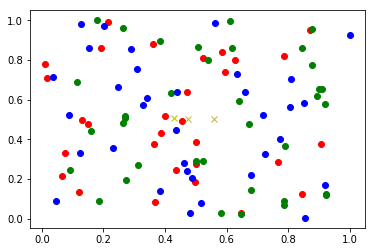

In [11]:
        centroid = compute_centroid(points_with_label, number_of_cluster)


        distancearray = distance_of_everypoints_from_each_centroid(points_with_label, centroid,
                                                     number_of_points, number_of_cluster)
        energy = caculate_energy(distancearray, points_with_label[LABEL():], number_of_points)
        print("Energy :"+str(energy)) # show first Energy
        show_points_with_3label(points_with_label, centroid) #plot

INPUT DATA AND INITIAL LABEL

In [12]:
        place_to_assign_label = label_of_point(distancearray)
        points_with_label = assign_label(points_with_label, place_to_assign_label, number_of_points)
        if energy == previous_energy:
            print("END OVER")
        #show the points with label
        previous_energy = energy

SINCE it dose not print "END OVER" the second data will be different from inital data

9.597300518942621


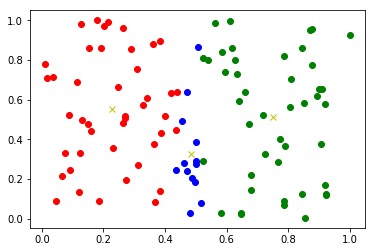

In [13]:
        centroid = compute_centroid(points_with_label, number_of_cluster)
        # the second Centroid !

        distancearray = distance_of_everypoints_from_each_centroid(points_with_label, centroid,
                                                     number_of_points, number_of_cluster)
        energy = caculate_energy(distancearray, points_with_label[LABEL():], number_of_points)
        print(energy)
        show_points_with_3label(points_with_label, centroid)

after first step

# get LAST DATA 

ENERGY for each iteration: 6.930202733146922
ENERGY for each iteration: 6.048488109695745
ENERGY for each iteration: 6.022149600423773
ENERGY for each iteration: 6.01468539023451
LAST ENERGY : 6.01468539023451


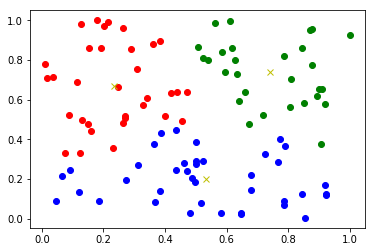

In [14]:
place_to_assign_label = label_of_point(distancearray)
points_with_label = assign_label(points_with_label, place_to_assign_label, number_of_points)
while (True): # the code will loop until find LAST DATA
    centroid = compute_centroid(points_with_label, number_of_cluster)
    distancearray = distance_of_everypoints_from_each_centroid(points_with_label, centroid,
                                             number_of_points, number_of_cluster)
    energy = caculate_energy(distancearray, points_with_label[LABEL():], number_of_points)
    place_to_assign_label = label_of_point(distancearray)
    points_with_label = assign_label(points_with_label, place_to_assign_label, number_of_points)
    if energy == previous_energy:
        break
    print("ENERGY for each iteration: " + str(energy))
    previous_energy = energy
#show the points with label (final) and energy (final)
print("LAST ENERGY : ",end="")
print(energy)
show_points_with_3label(points_with_label, centroid)

Final label and Final centroid 

Yellow X : centroid RED points : Label = 0 Green points : Label = 1 Blue points : Label =2